In [554]:
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

print(locale.localeconv())


{'int_curr_symbol': 'USD', 'currency_symbol': '$', 'mon_decimal_point': '.', 'mon_thousands_sep': ',', 'mon_grouping': [3, 0], 'positive_sign': '', 'negative_sign': '-', 'int_frac_digits': 2, 'frac_digits': 2, 'p_cs_precedes': 1, 'p_sep_by_space': 0, 'n_cs_precedes': 1, 'n_sep_by_space': 0, 'p_sign_posn': 3, 'n_sign_posn': 0, 'decimal_point': '.', 'thousands_sep': ',', 'grouping': [3, 0]}


# Carregando a Base de Dados

In [556]:
import pandas as pd 

In [557]:
path = 'Data/Apple 2009-2024.csv'
df = pd.read_csv(path)
df.head()


,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


# Tratamento de dados

## Ajustando Tipos de Dados

In [560]:
df.dtypes

year                              int64
EBITDA (millions)                object
Revenue (millions)               object
Gross Profit (millions)          object
Op Income (millions)             object
Net Income (millions)            object
EPS                              object
Shares Outstanding               object
Year Close Price                float64
Total Assets (millions)          object
Cash on Hand (millions)          object
Long Term Debt (millions)        object
Total Liabilities (millions)     object
Gross Margin                     object
PE ratio                        float64
Employees                        object
dtype: object

In [561]:
# Substitui os caracteres '$', ',' e '%' nas colunas do DataFrame
df = df.replace({'\$': '', ',': '', '%': ''}, regex=True)

# Lista de colunas para ajustar os tipos
colunas_para_ajustar_tipos  = ['EPS',
                               'EBITDA (millions)', 
                               'Revenue (millions)',
                               'Gross Profit (millions)', 
                               'Net Income (millions)',
                               'Op Income (millions)', 
                               'Net Income (millions)',
                               'Shares Outstanding', 
                               'Total Assets (millions)', 
                               'Cash on Hand (millions)', 
                               'Long Term Debt (millions)', 
                               'Total Liabilities (millions)', 
                               'Gross Margin', 
                               'Employees']

try:
    # Itera pelas colunas e converte para numérico
    for coluna in colunas_para_ajustar_tipos:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
        
except Exception as e:
    print(e)

# Verifica os tipos de dados das colunas
print(df.dtypes)


year                              int64
EBITDA (millions)                 int64
Revenue (millions)                int64
Gross Profit (millions)           int64
Op Income (millions)              int64
Net Income (millions)             int64
EPS                             float64
Shares Outstanding                int64
Year Close Price                float64
Total Assets (millions)           int64
Cash on Hand (millions)           int64
Long Term Debt (millions)         int64
Total Liabilities (millions)      int64
Gross Margin                    float64
PE ratio                        float64
Employees                         int64
dtype: object


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\games\AppData\Local\Temp\ipykernel_10788\2617283944.py:2: SyntaxWarning: invalid escape sequence '\$'
  df = df.replace({'\$': '', ',': '', '%': ''}, regex=True)


In [562]:
colunas_traduzidas = {
    'year': 'ano',
    'EBITDA (millions)': 'EBITDA (milhões)',
    'Revenue (millions)': 'Receita (milhões)',
    'Gross Profit (millions)': 'Lucro Bruto (milhões)',
    'Op Income (millions)': 'Lucro Operacional (milhões)',
    'Net Income (millions)': 'Lucro Líquido (milhões)',
    'EPS': 'LPA (Lucro por Ação)',
    'Shares Outstanding': 'Ações Em Circulação',
    'Year Close Price': 'Preço de Fechamento do Ano',
    'Total Assets (millions)': 'Ativos Totais (milhões)',
    'Cash on Hand (millions)': 'Caixa (milhões)',
    'Long Term Debt (millions)': 'Dívida de Longo Prazo (milhões)',
    'Total Liabilities (millions)': 'Passivos Totais (milhões)',
    'Gross Margin': 'Margem Bruta (%)',
    'PE ratio': 'Índice P/L',
    'Employees': 'QTD Empregados'
}

df = df.rename(columns=colunas_traduzidas)

In [563]:
df.head()

,ano,EBITDA (milhões),Receita (milhões),Lucro Bruto (milhões),Lucro Operacional (milhões),Lucro Líquido (milhões),LPA (Lucro por Ação),Ações Em Circulação,Preço de Fechamento do Ano,Ativos Totais (milhões),Caixa (milhões),Dívida de Longo Prazo (milhões),Passivos Totais (milhões),Margem Bruta (%),Índice P/L,QTD Empregados
0,2024,134661,391035,180683,123216,93736,6.08,15408,243.0400,364980,65171,85750,308030,46.21,39.97,164000
1,2023,125820,383285,169148,114301,96995,6.13,15813,191.5919,352583,61555,95281,290437,45.03,29.84,161000
2,2022,130541,394328,170782,119437,99803,6.11,16326,128.5816,352755,48304,98959,302083,43.06,21.83,164000
3,2021,120233,365817,152836,108949,94680,5.61,16865,174.7132,351002,62639,109106,287912,43.02,28.93,154000
4,2020,77344,274515,104956,66288,57411,3.28,17528,129.7556,323888,90943,98667,258549,38.78,35.14,147000


# Analise Exploratoria dos Dados

In [565]:
import matplotlib.pyplot as plt

In [566]:
colunas = ['ano', 'EBITDA (milhões)', 'Receita (milhões)', 'Lucro Bruto (milhões)',
           'Lucro Operacional (milhões)', 'Lucro Líquido (milhões)', 'LPA (Lucro por Ação)',
           'Ações Em Circulação', 'Preço de Fechamento do Ano', 'Ativos Totais (milhões)',
           'Caixa (milhões)', 'Dívida de Longo Prazo (milhões)', 'Passivos Totais (milhões)',
           'Margem Bruta (%)', 'Índice P/L', 'QTD Empregados']

In [567]:
import pandas as pd

# Suponha que você já tenha o DataFrame df com os dados

# Calcular a Margem Bruta (%)
df['Margem Bruta (%)'] = (df['Lucro Bruto (milhões)'] / df['Receita (milhões)']) * 100

# Calcular o LPA (Lucro por Ação)
df['LPA (Lucro por Ação)'] = df['Lucro Líquido (milhões)'] / df['Ações Em Circulação']

# Calcular o Índice P/L (Preço sobre Lucro)
df['Índice P/L'] = df['Preço de Fechamento do Ano'] / df['LPA (Lucro por Ação)']

# Calcular a Dívida sobre Ativos Totais
df['Dívida sobre Ativos'] = df['Dívida de Longo Prazo (milhões)'] / df['Ativos Totais (milhões)']


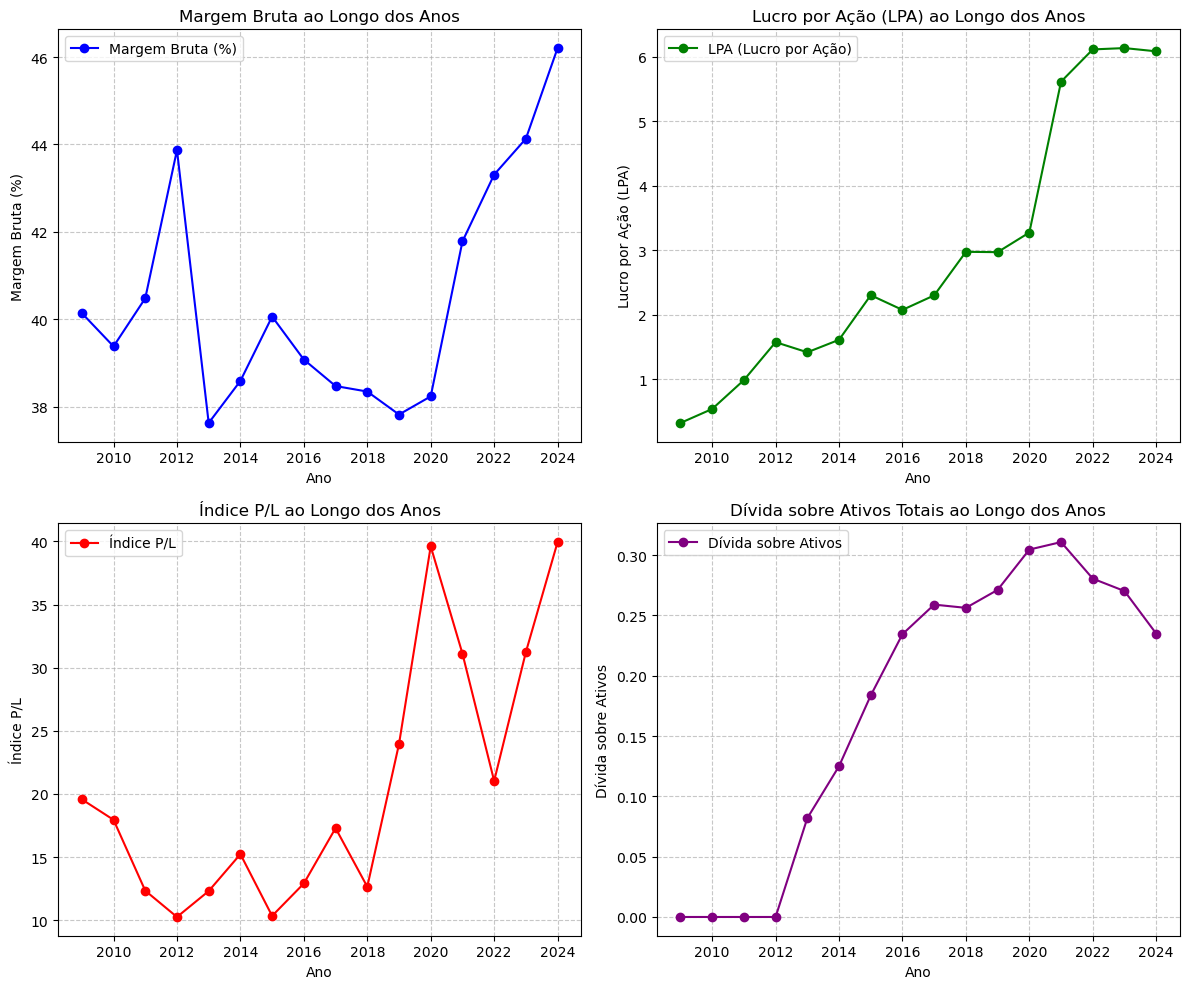

In [586]:
import matplotlib.pyplot as plt

df['Margem Bruta (%)'] = (df['Lucro Bruto (milhões)'] / df['Receita (milhões)']) * 100
df['LPA (Lucro por Ação)'] = df['Lucro Líquido (milhões)'] / df['Ações Em Circulação']
df['Índice P/L'] = df['Preço de Fechamento do Ano'] / df['LPA (Lucro por Ação)']
df['Dívida sobre Ativos'] = df['Dívida de Longo Prazo (milhões)'] / df['Ativos Totais (milhões)']

plt.figure(figsize=(12, 10))

# Gráfico da Margem Bruta (%)
plt.subplot(2, 2, 1)
plt.plot(df['ano'], df['Margem Bruta (%)'], marker='o', color='b', label='Margem Bruta (%)')
plt.title('Margem Bruta ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Margem Bruta (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Gráfico do LPA (Lucro por Ação)
plt.subplot(2, 2, 2)
plt.plot(df['ano'], df['LPA (Lucro por Ação)'], marker='o', color='g', label='LPA (Lucro por Ação)')
plt.title('Lucro por Ação (LPA) ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Lucro por Ação (LPA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Gráfico do Índice P/L
plt.subplot(2, 2, 3)
plt.plot(df['ano'], df['Índice P/L'], marker='o', color='r', label='Índice P/L')
plt.title('Índice P/L ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Índice P/L')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Gráfico da Dívida sobre Ativos Totais
plt.subplot(2, 2, 4)
plt.plot(df['ano'], df['Dívida sobre Ativos'], marker='o', color='purple', label='Dívida sobre Ativos')
plt.title('Dívida sobre Ativos Totais ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Dívida sobre Ativos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [588]:
df

,ano,EBITDA (milhões),Receita (milhões),Lucro Bruto (milhões),Lucro Operacional (milhões),Lucro Líquido (milhões),LPA (Lucro por Ação),Ações Em Circulação,Preço de Fechamento do Ano,Ativos Totais (milhões),Caixa (milhões),Dívida de Longo Prazo (milhões),Passivos Totais (milhões),Margem Bruta (%),Índice P/L,QTD Empregados,Dívida sobre Ativos
0,2024,134661,391035,180683,123216,93736,6.083593,15408,243.0400,364980,65171,85750,308030,46.206350,39.950076,164000,0.234944
1,2023,125820,383285,169148,114301,96995,6.133877,15813,191.5919,352583,61555,95281,290437,44.131130,31.235040,161000,0.270237
2,2022,130541,394328,170782,119437,99803,6.113132,16326,128.5816,352755,48304,98959,302083,43.309631,21.033668,164000,0.280532
3,2021,120233,365817,152836,108949,94680,5.613993,16865,174.7132,351002,62639,109106,287912,41.779360,31.121019,154000,0.310842
4,2020,77344,274515,104956,66288,57411,3.275388,17528,129.7556,323888,90943,98667,258549,38.233248,39.615338,147000,0.304633
5,2019,76477,260174,98392,63930,55256,2.971392,18596,71.1734,338516,100557,91807,248028,37.817768,23.952884,137000,0.271204
6,2018,81801,265595,101839,70898,59531,2.976550,20000,37.6645,365725,66301,93735,258578,38.343719,12.653743,132000,0.256299
7,2017,71501,229234,88186,61344,48351,2.301661,21007,39.8109,375319,74181,97207,241272,38.469860,17.296593,123000,0.258998
8,2016,70529,215639,84263,60024,45687,2.076587,22001,26.8131,321686,67155,75427,193437,39.075956,12.912098,116000,0.234474
9,2015,82487,233715,93626,71230,53394,2.304247,23172,23.8379,290345,41601,53329,170990,40.059902,10.345204,110000,0.183675
